## 4. Cross Tabulation

An approach to summarize and identify the relation between two or more categorical variables or parameters

Describes two variables simultaneously

Expressed as two way table

Variables need to be categorical or grouped

"
					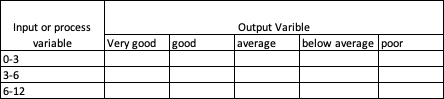

**Example**
An ITes company has collected the data from 116 employees on their response to the appraisal results, their gender, location and vintage. The data is given in Appraisal_Response file.

    1. Does male and female differ in their response to appraisal?
    2. Does employees in different locations differ in their response to appraisal?
    3. Does employees with different vintages differe in their response to appraisal?

In [1]:
#Import packages
import pandas as pd

In [2]:
#Load data
data = pd.read_excel('Appraisal_Response.xlsx')

In [3]:
#Explore the dataset
data.head()

,SL No,Response,Gender,Location,Vintage
0,1,1 - Disappointed,Male,Pune,12-24
1,2,3 - Happy,Female,Bangalore,0-12
2,3,2 - No Comments,Female,Bangalore,12-24
3,4,2 - No Comments,Female,Bangalore,12-24
4,5,2 - No Comments,Female,Pune,0-12


In [4]:
#Copy the fields into new variables
response = data.Response
gender = data.Gender
location = data.Location
vintage = data.Vintage

In [5]:
#Relation between Gender and Response
table = pd.crosstab(index=gender,columns=response)

In [6]:
table

Response,1 - Disappointed,2 - No Comments,3 - Happy
Gender,,,
Female,12,12,36
Male,30,12,14


From the table it is visible that males are unhappy compared to females in appraisal.

We can express the table as percentage

In [7]:
#Count the total number of values
n = table.sum(axis=0)
n

Response
1 - Disappointed    42
2 - No Comments     24
3 - Happy           50
dtype: int64

In [8]:
#Cross tabulation in %
round(table/n*100,2)

Response,1 - Disappointed,2 - No Comments,3 - Happy
Gender,,,
Female,28.57,50.0,72.0
Male,71.43,50.0,28.0


In [9]:
#Relation between Location and Response
table = pd.crosstab(index=location,columns=response)
table

Response,1 - Disappointed,2 - No Comments,3 - Happy
Location,,,
Bangalore,20,12,23
Pune,22,12,27


In [10]:
#Cross tabulation in %
round(table/n*100,2)

Response,1 - Disappointed,2 - No Comments,3 - Happy
Location,,,
Bangalore,47.62,50.0,46.0
Pune,52.38,50.0,54.0


We find out that location does not play important role in happiness.

In [11]:
#Relation between Vintage and Response
table = pd.crosstab(index=vintage, columns=response)
table

Response,1 - Disappointed,2 - No Comments,3 - Happy
Vintage,,,
0-12,4,12,34
12-24,20,10,10
24 & More,18,2,6


In [12]:
#Cross tabulation in %
round(table/n*100,2)

Response,1 - Disappointed,2 - No Comments,3 - Happy
Vintage,,,
0-12,9.52,50.00,68.0
12-24,47.62,41.67,20.0
24 & More,42.86,8.33,12.0


we find out more vintage, more unhappy.

## Chi-sq test

**Objective:**

To test whether two categorical variables are related or not

To check whether a metric is depends on another metric

Check the independence in contingency table


**Usage:**
When both the variables ( x & y) need to be categorical (grouped)

H0: Relation between x & y = 0 or x and y are independent 

H1: Relation between x & y != 0 or x and y are not independent

If p value < 0.05, then H0 is rejected.



**Exercise**

In [13]:
#Relation between Gender and Response
table = pd.crosstab(index=gender,columns=response)
table

Response,1 - Disappointed,2 - No Comments,3 - Happy
Gender,,,
Female,12,12,36
Male,30,12,14


In [14]:
#Import the packages
from scipy import stats

In [15]:
#Chi Square test
test = stats.chi2_contingency(table)

In [16]:
# test statistic
chi_sq = test[0]

In [17]:
chi_sq

17.276897959183675

In [18]:
# p value
p_value = test[1]
p_value

0.0001771614703131788

In [19]:
#Relation between Location and Response
table = pd.crosstab(index=location,columns=response)
table

Response,1 - Disappointed,2 - No Comments,3 - Happy
Location,,,
Bangalore,20,12,23
Pune,22,12,27


In [20]:
#Chi Square test
test = stats.chi2_contingency(table)

In [21]:
# test statistic
chi_sq = test[0]

In [22]:
chi_sq

0.10517465048612613

In [23]:
# p value
p_value = test[1]
p_value

0.9487714657393166

In [24]:
#Relation between Location and Response
table = pd.crosstab(index=vintage,columns=response)
table

Response,1 - Disappointed,2 - No Comments,3 - Happy
Vintage,,,
0-12,4,12,34
12-24,20,10,10
24 & More,18,2,6


In [25]:
#Chi Square test
test = stats.chi2_contingency(table)

In [26]:
# test statistic
chi_sq = test[0]

In [27]:
chi_sq

36.31807032967033

In [28]:
# p value
p_value = test[1]
round(p_value,2)

0.0